In [63]:
import cv2
from plantcv import plantcv as pcv
import numpy as np

In [64]:
class options:
    def __init__(self):
        self.image = "./DroneImages/3_OT7100_3_AUSTRIAN FIELD PEAS_2_Bio Mass 1 picture_1_2023-06-06-09-43-01.jpg"
        self.debug = "plot"
        self.writeimg= False 
        self.result = "Output/"
        self.outdir = "."

# Get options
args = options()

# Set debug to the global parameter 
pcv.params.debug = args.debug

In [65]:
# Train naive bayes classifier and generate probability density functions

#!plantcv-train.py naive_bayes_multiclass --file ./TrainingData/OatPeaPixels.txt --outfile ./Output/naive_bayes_pdfs.txt --plots

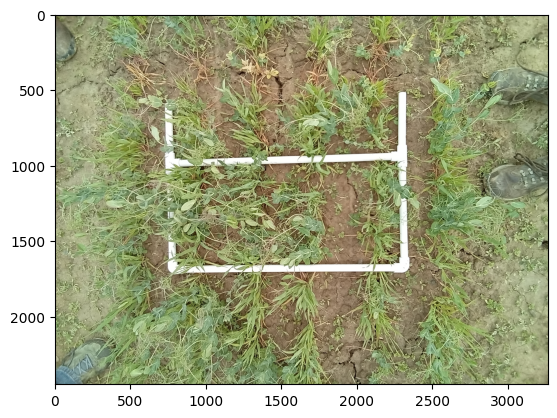

In [66]:
# Read image 

# Inputs:
#   filename - Image file to be read in 
#   mode - Return mode of image; either 'native' (default), 'rgb', 'gray', or 'csv' 
img, path, filename = pcv.readimage(filename=args.image)

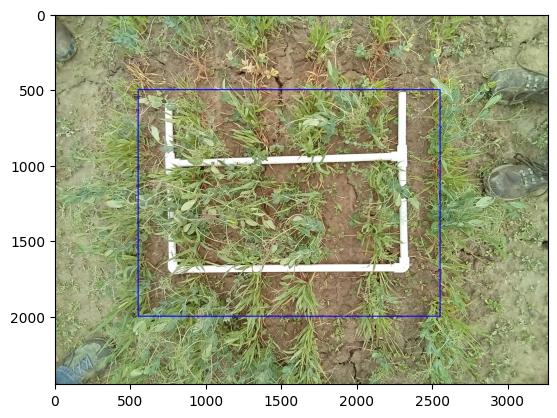

In [67]:
# Crop image
crop_img = pcv.crop(img=img, x=550, y=500, h=1500, w=2000)

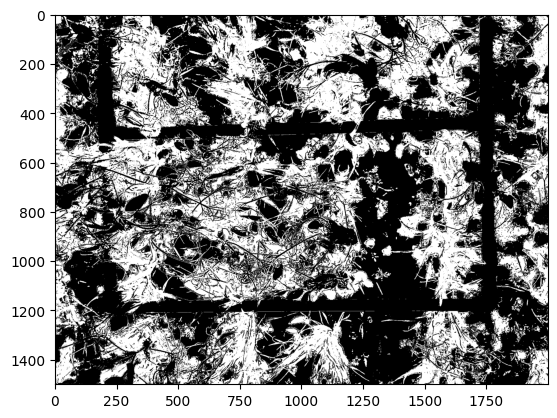

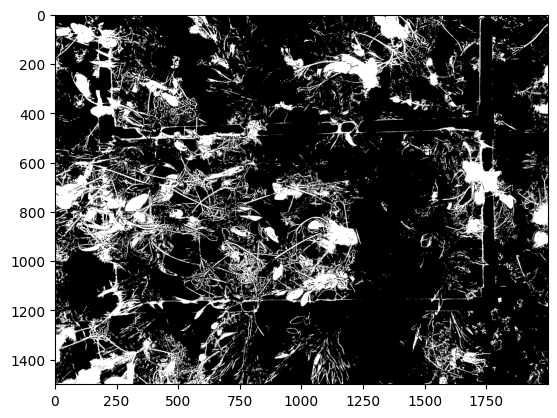

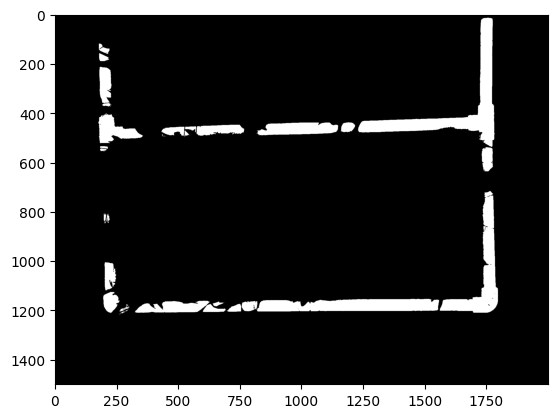

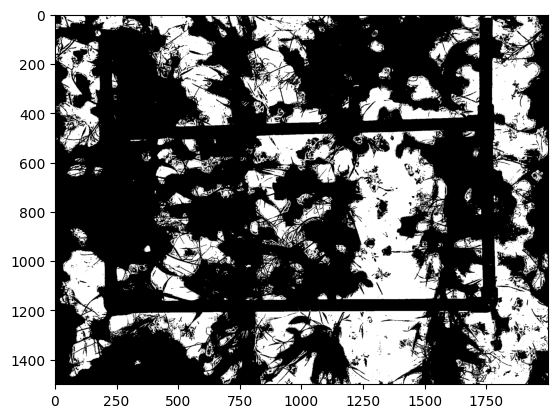

In [68]:
# Use the output file from `plantcv-train.py` to run the multiclass 
# naive bayes classification on the image. The function below will 
# print out masks for each class

# Inputs: 
#   rgb_img - RGB image data 
#   pdf_file - Output file containing PDFs from `plantcv-train.py`
mask = pcv.naive_bayes_classifier(rgb_img=crop_img, 
                                 pdf_file="./Output/naive_bayes_pdfs.txt")

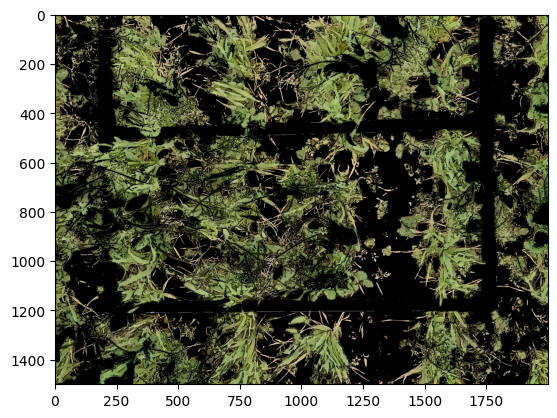

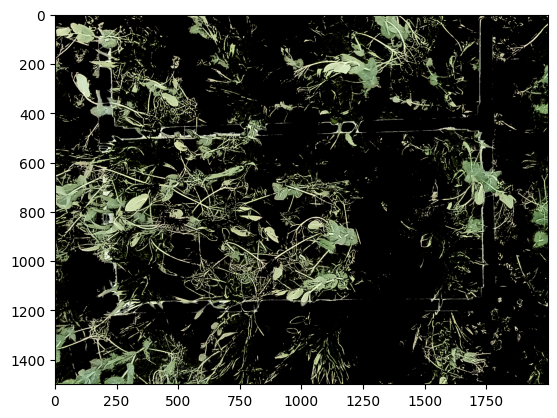

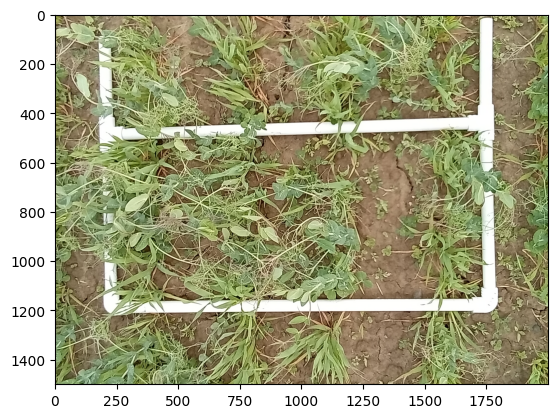

In [69]:
OAT_img = pcv.apply_mask(mask=(mask['OAT']), img=crop_img, mask_color='black')
PEA_img = pcv.apply_mask(mask=(mask['PEA']), img=crop_img, mask_color='black')
pcv.plot_image(crop_img)

In [70]:
# Calculate percent area for oats and peas
oat_area = np.count_nonzero(mask['OAT'])
pea_area = np.count_nonzero(mask['PEA'])
soil_area = np.count_nonzero(mask['SOIL'])
quadrat_area = np.count_nonzero(mask['QUADRAT'])
total_area = oat_area + pea_area + soil_area + quadrat_area

percent_oat = 100 * oat_area / total_area
percent_pea = 100 * pea_area / total_area
percent_soil = 100 * soil_area / total_area

print("percent area oat:", round(percent_oat,2))
print("percent area pea:", round(percent_pea,2))
print("percent area soil:", round(percent_soil,2))

percent area oat: 41.31
percent area pea: 20.3
percent area soil: 32.22
